# Reconocimiento de patrones: Preparación de datos
### Ramón Soto C. [(rsotoc@moviquest.com)](mailto:rsotoc@moviquest.com/)
![ ](images/blank.png)
![agents](images/binary_data_under_a_magnifying.jpg)
[ver en nbviewer](http://nbviewer.ipython.org/github/rsotoc/pattern-recognition/blob/master/Limpieza%20de%20datos%20I.ipynb)

## Definición

Los datos son la base de la nueva economía de la información. Cada día se generan 2.5 x 10<sup>18</sup> bytes de datos ([aquí](http://www.vcloudnews.com/every-day-big-data-statistics-2-5-quintillion-bytes-of-data-created-daily/) un interesante *infographic* al respecto), provenientes de sensores, GPSs, redes sociales, mensajes electrónicos, transacciones comerciales, publicaciones regulares, etc. Esos datos permiten generar una gran cantidad de información para atender virtualmente cualquier problema. Sin embargo, antes de poder explotar la información contenida en ellos y antes de poder generar conocimiento de utilidad para la toma de decisiones, es necesario garantizar que los datos se encuentren en 'buenas condiciones'. 

Es una estimación bien conocida en tre los científicos de datos que el 80% del tiempo dedicado a la solución de un problema se invierte en la preparación de los datos: 

![](images/time.jpg)
![ ](images/blank.png)

El proceso de mejoramiento de los datos es lo que se denomina **preparación de los datos**. 
![](images/DataPreparation.png)
![ ](images/blank.png)
* La *limpieza de datos* consiste en rellenar valores faltantes, suavizar datos con ruido, identificar y remover valor atípicos y resolver inconsistencias. 
* La *integración de datos* es la integración de diversas fuentes de datos: bases de datos, cubos de datos o archivos. 
* La *selección de datos* consiste en seleccionar el conjunto de datos adecuado para analizar el sistema, incluyendo el muestreo. 
* La *selección de características* es un proceso mediante el cual se analizan las variables determinantes para describir los datos. 
* La *transformación de datos* incluye operaciones como normalización, agregación, codificación. 



## Limpieza de los datos 

### Valores faltantes 

El problema de valores faltantes es un problema muy frecuente al tratar de realizar cualquier tarea de análisis de datos y puede deberse a diversas razones: 
* Fallas en los mecanismos de medición (sensores defectuosos, por ejemplo) 
* Integración de conjuntos de datos no bien coordinados (mediciones con diferentes ciclos, por ejemplo) 
* Variables nuevas no consideradas o no disponibles originalmente 
* Respuestas omitidas intencionalmente por la fuente 

![](images/missingData.png)
![ ](images/blank.png)

La omisión de valores en el conjunto de datos puede tener diversos efectos y diferentes grados de impacto. En términos generales, se suelen considerar los siguientes grados de impacto, dependiendo del porcentaje de valores faltantes (*dumb rules*):
La omisión de valores en el conjunto de datos puede tener diversos efectos y diferentes grados de impacto. En términos generales, se suelen considerar los siguientes grados de impacto, dependiendo del porcentaje de valores faltantes (*dumb rules*):
* Menos de 1%: Trivial (no relevante)
* 1-5%: Manejable
* 5-15%: Manejable mediante métodos sofisticados
* Más de 15%: Crítico, con impacto severo en cualquier tipo de interpretación

Considérese el siguiente conjunto de datos tomados del conjunto de datos de diabetes:


In [1]:
"""
Reconocimiento de patrones: Limpieza de datos
"""

import numpy as np
import pandas as pd
import os

os.chdir('Data sets/Pima Indian Data Set') 

In [2]:
df = pd.read_csv("pima-indians-diabetes.data-small", 
                 names = ['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad', 'class'])

print(df.describe(), '\n')

print(df)

            emb        gl2h        pad        ept        is2h        imc  \
count  20.00000   20.000000  18.000000  11.000000    9.000000  19.000000   
mean    4.50000  129.400000  68.555556  32.363636  258.111111  32.578947   
std     3.56149   35.354446  16.346333   8.891262  263.487877   6.509103   
min     0.00000   78.000000  30.000000  19.000000   83.000000  23.300000   
25%     1.00000  106.000000  64.500000  26.000000   94.000000  27.600000   
50%     4.50000  117.000000  71.000000  32.000000  168.000000  30.500000   
75%     7.25000  152.500000  74.000000  36.500000  230.000000  36.450000   
max    10.00000  197.000000  96.000000  47.000000  846.000000  45.800000   

             fpd       edad     class  
count  20.000000  20.000000  20.00000  
mean    0.511650  37.450000   0.65000  
std     0.513691  11.591626   0.48936  
min     0.134000  21.000000   0.00000  
25%     0.198500  30.750000   0.00000  
50%     0.374500  32.000000   1.00000  
75%     0.560000  50.250000   1.000

Como puede observarse, la variable *count* no es la misma para todas las columnas. Comparando con el despliegue de los datos, las diferencias en el valor de esta variable corresponde a los valores faltantes. Una mayor exploración podemos obtenerla de la siguiente manera:

In [3]:
print ('Tabla de valores nulos')
print (df.isnull(), '\n')

print ('Contabilidad de valores nulos por columna')
print (df.isnull().sum(), '\n')

print ('Porcentaje de datos nulos en la columna *ept*')
eptNullPje = df['ept'].isnull().sum() / df.shape[0] * 100
print (eptNullPje)

Tabla de valores nulos
      emb   gl2h    pad    ept   is2h    imc    fpd   edad  class
0   False  False  False  False   True  False  False  False  False
1   False  False  False  False   True  False  False  False  False
2   False  False  False   True   True  False  False  False  False
3   False  False  False  False  False  False  False  False  False
4   False  False  False  False  False  False  False  False  False
5   False  False  False   True   True  False  False  False  False
6   False  False  False  False  False  False  False  False  False
7   False  False   True   True   True  False  False  False  False
8   False  False  False  False  False  False  False  False  False
9   False  False  False   True   True   True  False  False  False
10  False  False  False   True   True  False  False  False  False
11  False  False  False   True   True  False  False  False  False
12  False  False  False   True   True  False  False  False  False
13  False  False  False  False  False  False  False  

Como puede apreciarse, el porcentaje de valores faltantes en este segmento de datos (45% de valores faltantes) está muy por encima de lo que puede tratarse de manera directa, según las reglas anteriores. 

En muchos casos, incluso detectar los valores faltantes es un problema. En nuestros datos originales, lo valores faltantes vienen enmascarados como 0, no como un espacio vacío. En este caso, el procedimiento anterior fallaría pues no existen datos 'no disponibles'. Debemos primero analizar los datos y detectar cómo se manifiestan los valores faltantes. En nuestro ejemplo, asumimos que *ept*, esto es, el 'Espesor de la piel del tríceps' no puede tener un valor de 0 y, por lo tanto, ese valor representa un valor faltante. Para resolver el problema, debemos preparar los datos asignando una etiqueta *NaN* a los valores que consideramos como valores'faltantes': 


In [4]:
df2 = pd.read_csv("pima-indians-diabetes.data-small-orig", 
                 names = ['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad', 'class'])

print(df2, '\n')

df2.loc[df2['ept'] == 0,'ept'] = np.nan

print(df2)

    emb  gl2h  pad  ept  is2h   imc    fpd  edad  class
0     6   148   72   35     0  33.6  0.627    50      1
1     1    85   66   29     0  26.6  0.351    31      0
2     8   183   64    0     0  23.3  0.672    32      1
3     1    89   66   23    94  28.1  0.167    21      0
4     0   137   40   35   168  43.1  2.288    33      1
5     5   116   74    0     0  25.6  0.201    30      0
6     3    78   50   32    88  31.0  0.248    26      1
7    10   115    0    0     0  35.3  0.134    29      0
8     2   197   70   45   543  30.5  0.158    53      1
9     8   125   96    0     0   0.0  0.232    54      1
10    4   110   92    0     0  37.6  0.191    30      0
11   10   168   74    0     0  38.0  0.537    34      1
12   10   139   80    0     0  27.1  1.441    57      0
13    1   189   60   23   846  30.1  0.398    59      1
14    5   166   72   19   175  25.8  0.587    51      1
15    7   100    0    0     0  30.0  0.484    32      1
16    0   118   84   47   230  45.8  0.551    31

En plataformas para *data science*, como R y Pandas, los valores marcados como 'NaN' suelen ser ignorados en las operaciones: 


In [5]:
print(df2.info(), '\n')

print(df2.describe(), '\n')

print('Suma y promedio de ept: ({}, {})'.format(df2['ept'].sum(), df2['ept'].mean()), '\n')

print('Promedio tomando en cuenta los 0s:', df2['ept'].sum()/20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
emb      20 non-null int64
gl2h     20 non-null int64
pad      20 non-null int64
ept      11 non-null float64
is2h     20 non-null int64
imc      20 non-null float64
fpd      20 non-null float64
edad     20 non-null int64
class    20 non-null int64
dtypes: float64(3), int64(6)
memory usage: 1.5 KB
None 

            emb        gl2h        pad        ept        is2h        imc  \
count  20.00000   20.000000  20.000000  11.000000   20.000000  20.000000   
mean    4.50000  129.400000  61.700000  32.363636  116.150000  30.950000   
std     3.56149   35.354446  26.159631   8.891262  215.843821   9.654424   
min     0.00000   78.000000   0.000000  19.000000    0.000000   0.000000   
25%     1.00000  106.000000  57.500000  26.000000    0.000000  26.975000   
50%     4.50000  117.000000  70.000000  32.000000    0.000000  30.300000   
75%     7.25000  152.500000  74.000000  36.500000  114.00000


### Tratamiento de valores faltantes 

El método más simple para tratar con el problema de valores faltantes es la *eliminación de casos*, también conocido como *análisis de casos completos. Este método está disponible en todos los paquetes de análisis de datos y es la opción por omisión en la mayoría. 

En Pandas podemos eliminar los valores faltantes de diferentes maneras. *DataFrame.dropna*() elimina todos los renglones en el DataFrame en los que hay al menos un valor *NaN*:

In [6]:
print(df, '\n')
print(df.dropna())

    emb  gl2h   pad   ept   is2h   imc    fpd  edad  class
0     6   148  72.0  35.0    NaN  33.6  0.627    50      1
1     1    85  66.0  29.0    NaN  26.6  0.351    31      0
2     8   183  64.0   NaN    NaN  23.3  0.672    32      1
3     1    89  66.0  23.0   94.0  28.1  0.167    21      0
4     0   137  40.0  35.0  168.0  43.1  2.288    33      1
5     5   116  74.0   NaN    NaN  25.6  0.201    30      0
6     3    78  50.0  32.0   88.0  31.0  0.248    26      1
7    10   115   NaN   NaN    NaN  35.3  0.134    29      0
8     2   197  70.0  45.0  543.0  30.5  0.158    53      1
9     8   125  96.0   NaN    NaN   NaN  0.232    54      1
10    4   110  92.0   NaN    NaN  37.6  0.191    30      0
11   10   168  74.0   NaN    NaN  38.0  0.537    34      1
12   10   139  80.0   NaN    NaN  27.1  1.441    57      0
13    1   189  60.0  23.0  846.0  30.1  0.398    59      1
14    5   166  72.0  19.0  175.0  25.8  0.587    51      1
15    7   100   NaN   NaN    NaN  30.0  0.484    32     

El parámetro *tresh* en DataFrame.dropna() permite eliminar todos los renglones que no contengan al menos el número de columnas "limpias" expresado por el prámetro. En los ejemplos a continuación, se conservan 1) sólo los renglones que tienen al menos 8 columnas *limpias* y 2) los renglones que tienen al menos 7 columnas con valores definidos:

In [7]:
print(df.dropna(thresh=8), '\n')
print(df.dropna(thresh=7))

    emb  gl2h   pad   ept   is2h   imc    fpd  edad  class
0     6   148  72.0  35.0    NaN  33.6  0.627    50      1
1     1    85  66.0  29.0    NaN  26.6  0.351    31      0
3     1    89  66.0  23.0   94.0  28.1  0.167    21      0
4     0   137  40.0  35.0  168.0  43.1  2.288    33      1
6     3    78  50.0  32.0   88.0  31.0  0.248    26      1
8     2   197  70.0  45.0  543.0  30.5  0.158    53      1
13    1   189  60.0  23.0  846.0  30.1  0.398    59      1
14    5   166  72.0  19.0  175.0  25.8  0.587    51      1
16    0   118  84.0  47.0  230.0  45.8  0.551    31      1
18    1   103  30.0  38.0   83.0  43.3  0.183    33      0
19    1   115  70.0  30.0   96.0  34.6  0.529    32      1 

    emb  gl2h   pad   ept   is2h   imc    fpd  edad  class
0     6   148  72.0  35.0    NaN  33.6  0.627    50      1
1     1    85  66.0  29.0    NaN  26.6  0.351    31      0
2     8   183  64.0   NaN    NaN  23.3  0.672    32      1
3     1    89  66.0  23.0   94.0  28.1  0.167    21   

### Imputación 

El análisis de casos completos es una opción aceptable si el porcentaje de valores faltantes es pequeño. En la mayoría de los casos, es preferible reemplazar los valores faltantes por valores calculados por omisión o valores calculados. Esta operación se denomina **imputación**. En el siguiente ejemplo, todos los valores *NaN* son reemplazados por 0, lo cual pudiera seguir la lógica de que "si el dato no está disponible es que en realidad era cero.

In [8]:
print(df, "\n")
df3 = df.fillna(0)
print(df3, "\n")
print (df3.describe())

    emb  gl2h   pad   ept   is2h   imc    fpd  edad  class
0     6   148  72.0  35.0    NaN  33.6  0.627    50      1
1     1    85  66.0  29.0    NaN  26.6  0.351    31      0
2     8   183  64.0   NaN    NaN  23.3  0.672    32      1
3     1    89  66.0  23.0   94.0  28.1  0.167    21      0
4     0   137  40.0  35.0  168.0  43.1  2.288    33      1
5     5   116  74.0   NaN    NaN  25.6  0.201    30      0
6     3    78  50.0  32.0   88.0  31.0  0.248    26      1
7    10   115   NaN   NaN    NaN  35.3  0.134    29      0
8     2   197  70.0  45.0  543.0  30.5  0.158    53      1
9     8   125  96.0   NaN    NaN   NaN  0.232    54      1
10    4   110  92.0   NaN    NaN  37.6  0.191    30      0
11   10   168  74.0   NaN    NaN  38.0  0.537    34      1
12   10   139  80.0   NaN    NaN  27.1  1.441    57      0
13    1   189  60.0  23.0  846.0  30.1  0.398    59      1
14    5   166  72.0  19.0  175.0  25.8  0.587    51      1
15    7   100   NaN   NaN    NaN  30.0  0.484    32     

Sin embargo, en muchos casos un valor por omisión de cero no tiene sentido. En nuestro ejemplo con los datos de diabetes, un valor de cero en la columna *pad* (*Presión diastólica de la sangre*) es imposible en una persona viva. En este caso, una mejor opción es rellenar los valores faltantes por el mínimo registrado:

In [9]:
df3 = df.fillna(df.min())
print(df3, "\n")
print (df3.describe())

    emb  gl2h   pad   ept   is2h   imc    fpd  edad  class
0     6   148  72.0  35.0   83.0  33.6  0.627    50      1
1     1    85  66.0  29.0   83.0  26.6  0.351    31      0
2     8   183  64.0  19.0   83.0  23.3  0.672    32      1
3     1    89  66.0  23.0   94.0  28.1  0.167    21      0
4     0   137  40.0  35.0  168.0  43.1  2.288    33      1
5     5   116  74.0  19.0   83.0  25.6  0.201    30      0
6     3    78  50.0  32.0   88.0  31.0  0.248    26      1
7    10   115  30.0  19.0   83.0  35.3  0.134    29      0
8     2   197  70.0  45.0  543.0  30.5  0.158    53      1
9     8   125  96.0  19.0   83.0  23.3  0.232    54      1
10    4   110  92.0  19.0   83.0  37.6  0.191    30      0
11   10   168  74.0  19.0   83.0  38.0  0.537    34      1
12   10   139  80.0  19.0   83.0  27.1  1.441    57      0
13    1   189  60.0  23.0  846.0  30.1  0.398    59      1
14    5   166  72.0  19.0  175.0  25.8  0.587    51      1
15    7   100  30.0  19.0   83.0  30.0  0.484    32     

Otras alternativas comunes son rellenar los valores faltantes con el valor máximo o con valores estadísticos.

Reemplazar los valores faltantes por el valor promedio de esa variable es uno de los métodos más comunes de imputación, sin embargo la media es una medida vulnerable a valores atípicos. Una alternativa más robusta ante este problema es la mediana. 

In [10]:
print("Rellenando con el valor máximo \n", df.fillna(df.max()).describe(), "\n")
print("Rellenando con la media \n", df.fillna(df.mean()).describe(), "\n")
print("Rellenando con la mediana \n", df.fillna(df.median()).describe(), "\n")
print("Rellenando con la moda \n", df.fillna(df.mode()).describe())

Rellenando con el valor máximo 
             emb        gl2h        pad        ept        is2h        imc  \
count  20.00000   20.000000  20.000000  20.000000   20.000000  20.000000   
mean    4.50000  129.400000  71.300000  38.950000  581.450000  33.240000   
std     3.56149   35.354446  17.619069   9.870077  345.359687   6.991303   
min     0.00000   78.000000  30.000000  19.000000   83.000000  23.300000   
25%     1.00000  106.000000  65.500000  31.500000  173.250000  27.850000   
50%     4.50000  117.000000  72.000000  46.000000  846.000000  30.750000   
75%     7.25000  152.500000  81.000000  47.000000  846.000000  37.700000   
max    10.00000  197.000000  96.000000  47.000000  846.000000  45.800000   

             fpd       edad     class  
count  20.000000  20.000000  20.00000  
mean    0.511650  37.450000   0.65000  
std     0.513691  11.591626   0.48936  
min     0.134000  21.000000   0.00000  
25%     0.198500  30.750000   0.00000  
50%     0.374500  32.000000   1.00000  
75

Otra alternativa común es rellenar los valores faltantes con el valor no nulo previo o el siguiente:

In [11]:
print(df, "\n")
print("Replicar hacia enfrente\n", df.fillna(method='pad'), "\n")
print("Replicar hacia atrás\n", df.fillna(method='bfill'))

    emb  gl2h   pad   ept   is2h   imc    fpd  edad  class
0     6   148  72.0  35.0    NaN  33.6  0.627    50      1
1     1    85  66.0  29.0    NaN  26.6  0.351    31      0
2     8   183  64.0   NaN    NaN  23.3  0.672    32      1
3     1    89  66.0  23.0   94.0  28.1  0.167    21      0
4     0   137  40.0  35.0  168.0  43.1  2.288    33      1
5     5   116  74.0   NaN    NaN  25.6  0.201    30      0
6     3    78  50.0  32.0   88.0  31.0  0.248    26      1
7    10   115   NaN   NaN    NaN  35.3  0.134    29      0
8     2   197  70.0  45.0  543.0  30.5  0.158    53      1
9     8   125  96.0   NaN    NaN   NaN  0.232    54      1
10    4   110  92.0   NaN    NaN  37.6  0.191    30      0
11   10   168  74.0   NaN    NaN  38.0  0.537    34      1
12   10   139  80.0   NaN    NaN  27.1  1.441    57      0
13    1   189  60.0  23.0  846.0  30.1  0.398    59      1
14    5   166  72.0  19.0  175.0  25.8  0.587    51      1
15    7   100   NaN   NaN    NaN  30.0  0.484    32     

Esta forma de tratar el problema de valores faltantes es muy común en análisis de series de tiempo. Esta estrategia suele designarse como *último valor conocido* y equivale a asumir que el sistema no pudo cambiar demasiado desde la última medición. En otros casos debe anaizarse si los datos realmente tienen una estructura local; esto es, determinar si tiene sentido esperar que los registros vecinos tengan valores cercanos. en el caso del conjunto de datos de diabetes, esta suposición no es válida.

Podemos también limitar el número de registros que son modificados de esta forma:

In [12]:
print(df.fillna(method='pad', limit=1))

    emb  gl2h   pad   ept   is2h   imc    fpd  edad  class
0     6   148  72.0  35.0    NaN  33.6  0.627    50      1
1     1    85  66.0  29.0    NaN  26.6  0.351    31      0
2     8   183  64.0  29.0    NaN  23.3  0.672    32      1
3     1    89  66.0  23.0   94.0  28.1  0.167    21      0
4     0   137  40.0  35.0  168.0  43.1  2.288    33      1
5     5   116  74.0  35.0  168.0  25.6  0.201    30      0
6     3    78  50.0  32.0   88.0  31.0  0.248    26      1
7    10   115  50.0  32.0   88.0  35.3  0.134    29      0
8     2   197  70.0  45.0  543.0  30.5  0.158    53      1
9     8   125  96.0  45.0  543.0  30.5  0.232    54      1
10    4   110  92.0   NaN    NaN  37.6  0.191    30      0
11   10   168  74.0   NaN    NaN  38.0  0.537    34      1
12   10   139  80.0   NaN    NaN  27.1  1.441    57      0
13    1   189  60.0  23.0  846.0  30.1  0.398    59      1
14    5   166  72.0  19.0  175.0  25.8  0.587    51      1
15    7   100  72.0  19.0  175.0  30.0  0.484    32     

### Interpolación
La interpolación es un método formal para estimar valores en una serie de datos. La idea consiste en suponer que todos los puntos en la serie se encuentran sobre una curva subyacente, aunque desconocida. 
La forma más simple de interpolación es la *lineal*. En este caso se parte de dos puntos conocidos y los puntos intermedios (faltantes) se calculan como si estuvieran colocados sobre la línea recta que une a los puntos conocidos.

In [13]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

0     35.0
1     29.0
2     26.0
3     23.0
4     35.0
5     33.5
6     32.0
7     38.5
8     45.0
9     40.6
10    36.2
11    31.8
12    27.4
13    23.0
14    19.0
15    33.0
16    47.0
17    42.5
18    38.0
19    30.0
Name: ept, dtype: float64


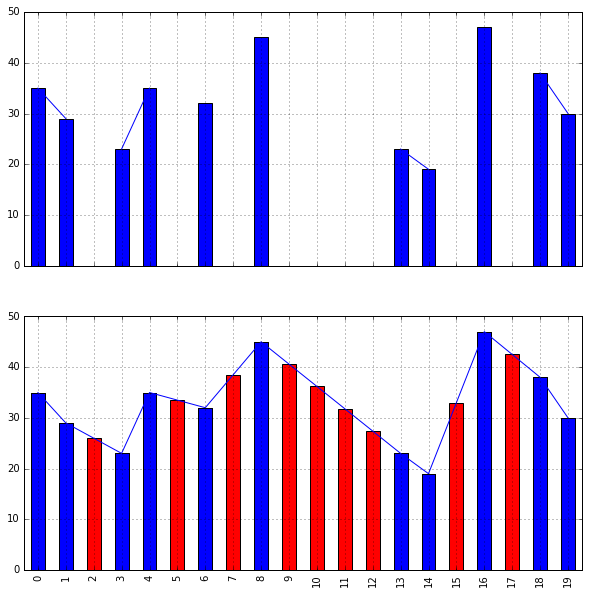

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(10,10))
df['ept'].plot(ax=axes[0])
df['ept'].plot(ax=axes[0], grid=True, kind="bar")

dfi = df['ept'].interpolate()
dfi.plot(ax=axes[1])
dfi.plot(ax=axes[1], grid=True, kind="bar", color="red")
df['ept'].plot(ax=axes[1], grid=True, kind="bar")

print (df['ept'].interpolate())

La aproximación lineal, aunque es la más simple, es la menos natural. Es posible utilizar cualquier otro conjunto de curvas, típicamente de la forma, que se ajusten a los datos conocidos. A continuación se presentan ajustes a curvas cuadráticas y cúbicas:

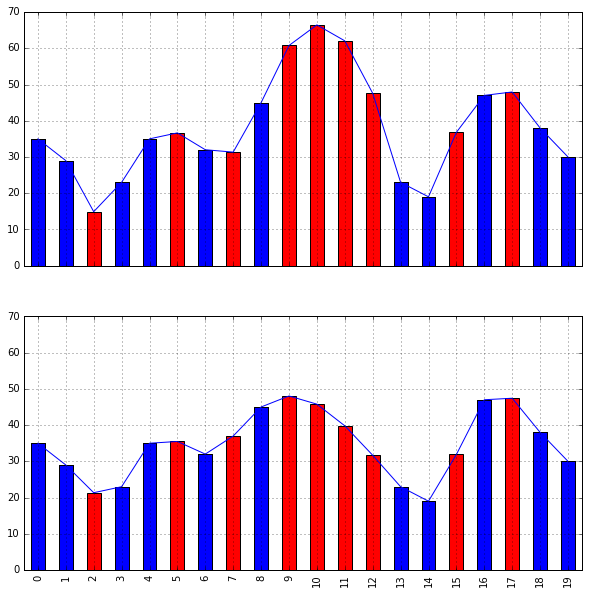

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(10,10))
dfi = df['ept'].interpolate(method="quadratic")
dfi.plot(ax=axes[0])
dfi.plot(ax=axes[0], grid=True, kind="bar", color="red")
df['ept'].plot(ax=axes[0], grid=True, kind="bar")

dfi = df['ept'].interpolate(method="cubic")
dfi.plot(ax=axes[1])
dfi.plot(ax=axes[1], grid=True, kind="bar", color="red")
df['ept'].plot(ax=axes[1], grid=True, kind="bar")

In [1]:
"""
Reconocimiento de patrones: Limpieza de datos
"""

import numpy as np
import pandas as pd
import os

os.chdir('C:/Users/Yocu/pattern-recognition/Data sets/Pima Indian Data Set') 

In [2]:
df = pd.read_csv("pima-indians-diabetes.data", 
                 names = ['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad', 'class'])

print(df.describe(), '\n')

print(df)

              emb        gl2h         pad         ept        is2h         imc  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

              fpd        edad       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

aqui en la data base completa podemos observar que los valores en la variable count son todas iguales se podria decir que no hay datos faltantes pero no es del todo cierto dada la gran cantidad de datos.
Pero podemos apreciar que en la variable min casi todas las columnas tienen valor 0 en algunas tendria sentido pero al fijarse detalladamente en la columna del imc que viene siendo indice de masa corporal dice que el valor min es de 0 y eso no puede ser lo que indica que tenemos datos erroneos en la base de datos.

In [3]:
print ('Tabla de valores nulos')
print (df.isnull(), '\n')

print ('Contabilidad de valores nulos por columna')
print (df.isnull().sum(), '\n')

print ('Porcentaje de datos nulos en la columna *ept*')
eptNullPje = df['ept'].isnull().sum() / df.shape[0] * 100
print (eptNullPje)

Tabla de valores nulos
       emb   gl2h    pad    ept   is2h    imc    fpd   edad  class
0    False  False  False  False  False  False  False  False  False
1    False  False  False  False  False  False  False  False  False
2    False  False  False  False  False  False  False  False  False
3    False  False  False  False  False  False  False  False  False
4    False  False  False  False  False  False  False  False  False
5    False  False  False  False  False  False  False  False  False
6    False  False  False  False  False  False  False  False  False
7    False  False  False  False  False  False  False  False  False
8    False  False  False  False  False  False  False  False  False
9    False  False  False  False  False  False  False  False  False
10   False  False  False  False  False  False  False  False  False
11   False  False  False  False  False  False  False  False  False
12   False  False  False  False  False  False  False  False  False
13   False  False  False  False  False 

En esta parte solo me fije en el ept y el imc que serian los que mas cobran sentido si hay algun dato faltante o algun dato erroneo en este casi hay solo 1 nand en el imc eso podria ser el porque tenemos en min 0 en el imc.

In [19]:
df2 = pd.read_csv("pima-indians-diabetes.data", 
                 names = ['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad', 'class'])

print(df2, '\n')

df2.loc[df2['ept'] == 0,'ept'] = np.nan
df2.loc[df2['imc'] == 0,'imc'] = np.nan

print(df2)

     emb  gl2h  pad  ept  is2h   imc    fpd  edad  class
0      6   148   72   35     0  33.6  0.627    50      1
1      1    85   66   29     0  26.6  0.351    31      0
2      8   183   64    0     0  23.3  0.672    32      1
3      1    89   66   23    94  28.1  0.167    21      0
4      0   137   40   35   168  43.1  2.288    33      1
5      5   116   74    0     0  25.6  0.201    30      0
6      3    78   50   32    88  31.0  0.248    26      1
7     10   115    0    0     0  35.3  0.134    29      0
8      2   197   70   45   543  30.5  0.158    53      1
9      8   125   96    0     0   0.0  0.232    54      1
10     4   110   92    0     0  37.6  0.191    30      0
11    10   168   74    0     0  38.0  0.537    34      1
12    10   139   80    0     0  27.1  1.441    57      0
13     1   189   60   23   846  30.1  0.398    59      1
14     5   166   72   19   175  25.8  0.587    51      1
15     7   100    0    0     0  30.0  0.484    32      1
16     0   118   84   47   230 

In [9]:
print(df2.info(), '\n')

print(df2.describe(), '\n')

print('Suma y promedio de ept: ({}, {})'.format(df2['ept'].sum(), df2['ept'].mean()), '\n')

print('Promedio tomando en cuenta los 0s:', df2['ept'].sum()/768)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
emb      768 non-null int64
gl2h     768 non-null int64
pad      768 non-null int64
ept      541 non-null float64
is2h     768 non-null int64
imc      768 non-null float64
fpd      768 non-null float64
edad     768 non-null int64
class    768 non-null int64
dtypes: float64(3), int64(6)
memory usage: 54.1 KB
None 

              emb        gl2h         pad         ept        is2h         imc  \
count  768.000000  768.000000  768.000000  541.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   29.153420   79.799479   31.992578   
std      3.369578   31.972618   19.355807   10.476982  115.244002    7.884160   
min      0.000000    0.000000    0.000000    7.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000         NaN    0.000000   27.300000   
50%      3.000000  117.000000   72.000000         NaN   30.500000   32.000000   
75%      6.00

C:\Users\Yocu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [6]:
print(df, '\n')
print(df.dropna())

     emb  gl2h  pad  ept  is2h   imc    fpd  edad  class
0      6   148   72   35     0  33.6  0.627    50      1
1      1    85   66   29     0  26.6  0.351    31      0
2      8   183   64    0     0  23.3  0.672    32      1
3      1    89   66   23    94  28.1  0.167    21      0
4      0   137   40   35   168  43.1  2.288    33      1
5      5   116   74    0     0  25.6  0.201    30      0
6      3    78   50   32    88  31.0  0.248    26      1
7     10   115    0    0     0  35.3  0.134    29      0
8      2   197   70   45   543  30.5  0.158    53      1
9      8   125   96    0     0   0.0  0.232    54      1
10     4   110   92    0     0  37.6  0.191    30      0
11    10   168   74    0     0  38.0  0.537    34      1
12    10   139   80    0     0  27.1  1.441    57      0
13     1   189   60   23   846  30.1  0.398    59      1
14     5   166   72   19   175  25.8  0.587    51      1
15     7   100    0    0     0  30.0  0.484    32      1
16     0   118   84   47   230 

In [10]:
print(df.dropna(thresh=8), '\n')
print(df.dropna(thresh=7))

     emb  gl2h  pad  ept  is2h   imc    fpd  edad  class
0      6   148   72   35     0  33.6  0.627    50      1
1      1    85   66   29     0  26.6  0.351    31      0
2      8   183   64    0     0  23.3  0.672    32      1
3      1    89   66   23    94  28.1  0.167    21      0
4      0   137   40   35   168  43.1  2.288    33      1
5      5   116   74    0     0  25.6  0.201    30      0
6      3    78   50   32    88  31.0  0.248    26      1
7     10   115    0    0     0  35.3  0.134    29      0
8      2   197   70   45   543  30.5  0.158    53      1
9      8   125   96    0     0   0.0  0.232    54      1
10     4   110   92    0     0  37.6  0.191    30      0
11    10   168   74    0     0  38.0  0.537    34      1
12    10   139   80    0     0  27.1  1.441    57      0
13     1   189   60   23   846  30.1  0.398    59      1
14     5   166   72   19   175  25.8  0.587    51      1
15     7   100    0    0     0  30.0  0.484    32      1
16     0   118   84   47   230 

In [11]:
print(df, "\n")
df3 = df.fillna(0)
print(df3, "\n")
print (df3.describe())

     emb  gl2h  pad  ept  is2h   imc    fpd  edad  class
0      6   148   72   35     0  33.6  0.627    50      1
1      1    85   66   29     0  26.6  0.351    31      0
2      8   183   64    0     0  23.3  0.672    32      1
3      1    89   66   23    94  28.1  0.167    21      0
4      0   137   40   35   168  43.1  2.288    33      1
5      5   116   74    0     0  25.6  0.201    30      0
6      3    78   50   32    88  31.0  0.248    26      1
7     10   115    0    0     0  35.3  0.134    29      0
8      2   197   70   45   543  30.5  0.158    53      1
9      8   125   96    0     0   0.0  0.232    54      1
10     4   110   92    0     0  37.6  0.191    30      0
11    10   168   74    0     0  38.0  0.537    34      1
12    10   139   80    0     0  27.1  1.441    57      0
13     1   189   60   23   846  30.1  0.398    59      1
14     5   166   72   19   175  25.8  0.587    51      1
15     7   100    0    0     0  30.0  0.484    32      1
16     0   118   84   47   230 

In [12]:
df3 = df.fillna(df.min())
print(df3, "\n")
print (df3.describe())

     emb  gl2h  pad  ept  is2h   imc    fpd  edad  class
0      6   148   72   35     0  33.6  0.627    50      1
1      1    85   66   29     0  26.6  0.351    31      0
2      8   183   64    0     0  23.3  0.672    32      1
3      1    89   66   23    94  28.1  0.167    21      0
4      0   137   40   35   168  43.1  2.288    33      1
5      5   116   74    0     0  25.6  0.201    30      0
6      3    78   50   32    88  31.0  0.248    26      1
7     10   115    0    0     0  35.3  0.134    29      0
8      2   197   70   45   543  30.5  0.158    53      1
9      8   125   96    0     0   0.0  0.232    54      1
10     4   110   92    0     0  37.6  0.191    30      0
11    10   168   74    0     0  38.0  0.537    34      1
12    10   139   80    0     0  27.1  1.441    57      0
13     1   189   60   23   846  30.1  0.398    59      1
14     5   166   72   19   175  25.8  0.587    51      1
15     7   100    0    0     0  30.0  0.484    32      1
16     0   118   84   47   230 

In [13]:
print("Rellenando con el valor máximo \n", df.fillna(df.max()).describe(), "\n")
print("Rellenando con la media \n", df.fillna(df.mean()).describe(), "\n")
print("Rellenando con la mediana \n", df.fillna(df.median()).describe(), "\n")
print("Rellenando con la moda \n", df.fillna(df.mode()).describe())

Rellenando con el valor máximo 
               emb        gl2h         pad         ept        is2h         imc  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

              fpd        edad       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750

In [14]:
print(df, "\n")
print("Replicar hacia enfrente\n", df.fillna(method='pad'), "\n")
print("Replicar hacia atrás\n", df.fillna(method='bfill'))

     emb  gl2h  pad  ept  is2h   imc    fpd  edad  class
0      6   148   72   35     0  33.6  0.627    50      1
1      1    85   66   29     0  26.6  0.351    31      0
2      8   183   64    0     0  23.3  0.672    32      1
3      1    89   66   23    94  28.1  0.167    21      0
4      0   137   40   35   168  43.1  2.288    33      1
5      5   116   74    0     0  25.6  0.201    30      0
6      3    78   50   32    88  31.0  0.248    26      1
7     10   115    0    0     0  35.3  0.134    29      0
8      2   197   70   45   543  30.5  0.158    53      1
9      8   125   96    0     0   0.0  0.232    54      1
10     4   110   92    0     0  37.6  0.191    30      0
11    10   168   74    0     0  38.0  0.537    34      1
12    10   139   80    0     0  27.1  1.441    57      0
13     1   189   60   23   846  30.1  0.398    59      1
14     5   166   72   19   175  25.8  0.587    51      1
15     7   100    0    0     0  30.0  0.484    32      1
16     0   118   84   47   230 

In [15]:
print(df.fillna(method='pad', limit=1))

     emb  gl2h  pad  ept  is2h   imc    fpd  edad  class
0      6   148   72   35     0  33.6  0.627    50      1
1      1    85   66   29     0  26.6  0.351    31      0
2      8   183   64    0     0  23.3  0.672    32      1
3      1    89   66   23    94  28.1  0.167    21      0
4      0   137   40   35   168  43.1  2.288    33      1
5      5   116   74    0     0  25.6  0.201    30      0
6      3    78   50   32    88  31.0  0.248    26      1
7     10   115    0    0     0  35.3  0.134    29      0
8      2   197   70   45   543  30.5  0.158    53      1
9      8   125   96    0     0   0.0  0.232    54      1
10     4   110   92    0     0  37.6  0.191    30      0
11    10   168   74    0     0  38.0  0.537    34      1
12    10   139   80    0     0  27.1  1.441    57      0
13     1   189   60   23   846  30.1  0.398    59      1
14     5   166   72   19   175  25.8  0.587    51      1
15     7   100    0    0     0  30.0  0.484    32      1
16     0   118   84   47   230 

In [16]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

0      35
1      29
2       0
3      23
4      35
5       0
6      32
7       0
8      45
9       0
10      0
11      0
12      0
13     23
14     19
15      0
16     47
17      0
18     38
19     30
20     41
21      0
22      0
23     35
24     33
25     26
26      0
27     15
28     19
29      0
       ..
738    17
739     0
740    37
741    20
742    18
743     0
744    37
745    33
746    41
747    41
748    22
749     0
750     0
751    39
752    24
753    44
754    32
755    39
756    41
757     0
758     0
759     0
760    26
761    31
762     0
763    48
764    27
765    23
766     0
767    31
Name: ept, dtype: int64


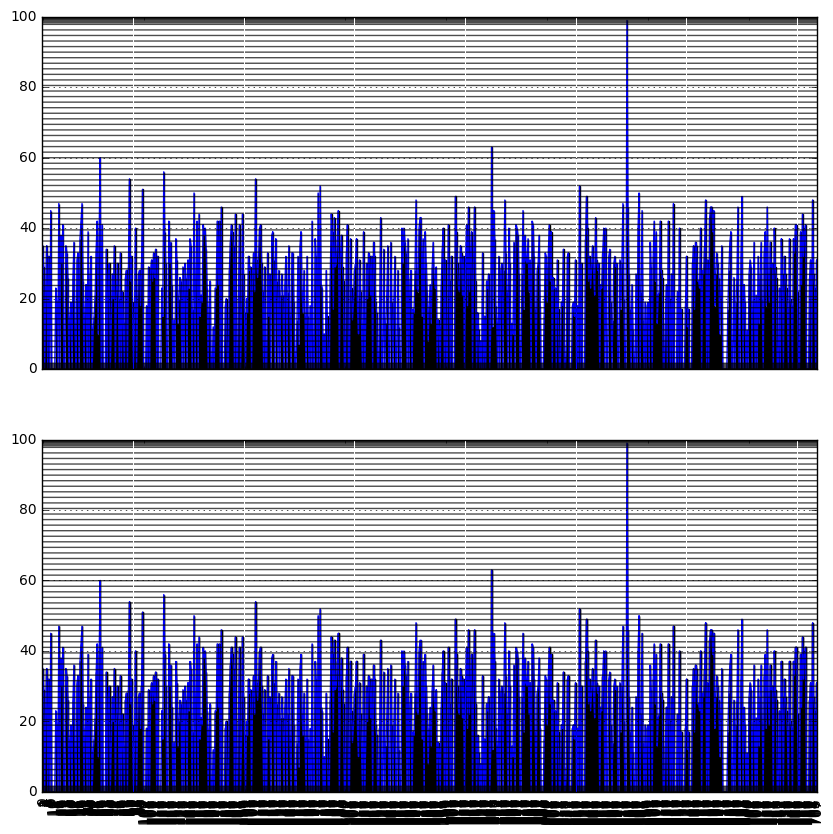

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(10,10))
df['ept'].plot(ax=axes[0])
df['ept'].plot(ax=axes[0], grid=True, kind="bar")

dfi = df['ept'].interpolate()
dfi.plot(ax=axes[1])
dfi.plot(ax=axes[1], grid=True, kind="bar", color="red")
df['ept'].plot(ax=axes[1], grid=True, kind="bar")

print (df['ept'].interpolate())

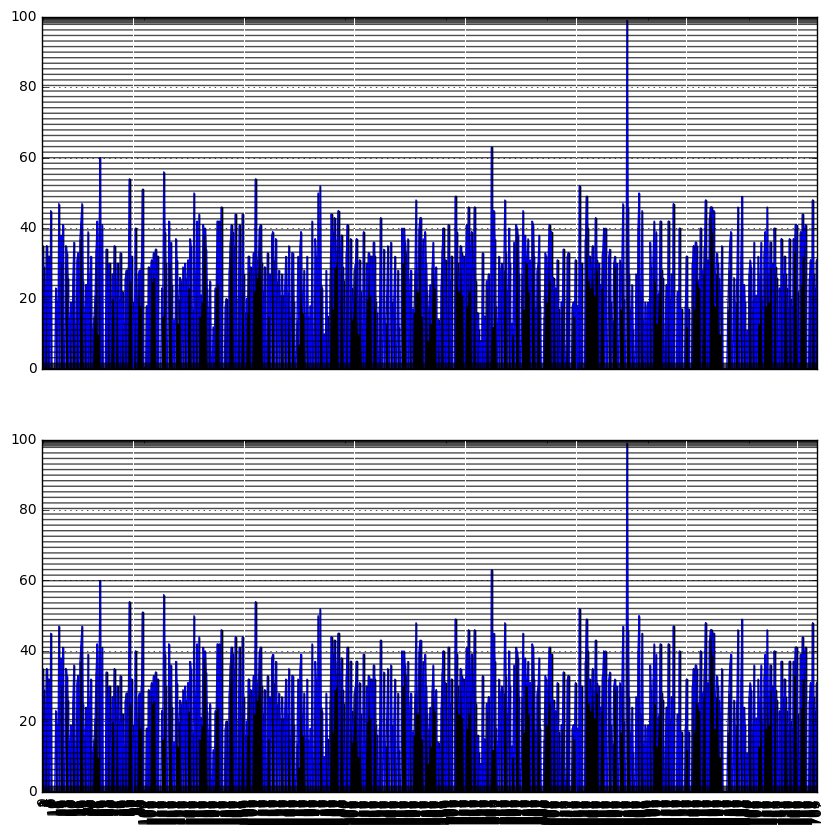

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(10,10))
dfi = df['ept'].interpolate(method="quadratic")
dfi.plot(ax=axes[0])
dfi.plot(ax=axes[0], grid=True, kind="bar", color="red")
df['ept'].plot(ax=axes[0], grid=True, kind="bar")

dfi = df['ept'].interpolate(method="cubic")
dfi.plot(ax=axes[1])
dfi.plot(ax=axes[1], grid=True, kind="bar", color="red")
df['ept'].plot(ax=axes[1], grid=True, kind="bar")

Cualquier otra técnica de predicción puede ser empleada para rellenar los valores faltantes. Una de las más importantes es el razonamiento basado en casos ([RBC](https://en.wikipedia.org/wiki/Case-based_reasoning)). 

<hr style="border-width: 3px;">

### Tarea 2

* Analice los problemas de valores faltantes en el conjunto de datos *Pima Indians Diabetes* completo. 
* Realice la imputación de los datos utilizando 3 aproximaciones diferentes y compare los resultados.
* Realice una estimación de valores faltantes mediante interpolación.

**Fecha de entrega**: Martes 31 de enero.


<br><br>
<hr style="border-width: 3px;">

## Pima Indians Diabetes Data Set... completo

In [16]:
df3 = pd.read_csv("pima-indians-diabetes.data", 
                 names = ['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad', 'class'])

print(df3.describe(), '\n')

print(df3)

              emb        gl2h         pad         ept        is2h         imc  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

              fpd        edad       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [17]:
df3.loc[df3['ept'] == 0,'ept'] = np.nan
print(df3.describe(), '\n')

print(df3)

              emb        gl2h         pad         ept        is2h         imc  \
count  768.000000  768.000000  768.000000  541.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   29.153420   79.799479   31.992578   
std      3.369578   31.972618   19.355807   10.476982  115.244002    7.884160   
min      0.000000    0.000000    0.000000    7.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000   22.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   29.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   36.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

              fpd        edad       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [18]:
print ('Tabla de valores nulos')
print (df3.isnull(), '\n')

print ('Contabilidad de valores nulos por columna')
print (df3.isnull().sum(), '\n')

print ('Porcentaje de datos nulos en la columna *ept*')
eptNullPje2 = df3['ept'].isnull().sum() / df3.shape[0] * 100
print (eptNullPje2)

Tabla de valores nulos
       emb   gl2h    pad    ept   is2h    imc    fpd   edad  class
0    False  False  False  False  False  False  False  False  False
1    False  False  False  False  False  False  False  False  False
2    False  False  False   True  False  False  False  False  False
3    False  False  False  False  False  False  False  False  False
4    False  False  False  False  False  False  False  False  False
5    False  False  False   True  False  False  False  False  False
6    False  False  False  False  False  False  False  False  False
7    False  False  False   True  False  False  False  False  False
8    False  False  False  False  False  False  False  False  False
9    False  False  False   True  False  False  False  False  False
10   False  False  False   True  False  False  False  False  False
11   False  False  False   True  False  False  False  False  False
12   False  False  False   True  False  False  False  False  False
13   False  False  False  False  False 

<br><br>
<hr style="border-width: 3px;">

## Forestry Production and Trade

![](Data%20sets/Forestry%20Production%20and%20Trade/FAO.png)

In [19]:
df4 = pd.read_csv("../Forestry Production and Trade/FAOSTAT_data_2015.csv")

print(df4.describe(), '\n')

from IPython.display import display
display(df4)

       Area Code  Element Code    Item Code  Year Code    Year         Value
count      206.0    206.000000   206.000000      206.0   206.0  2.060000e+02
mean       138.0   5712.262136  1646.373786     2015.0  2015.0  4.646728e+05
std          0.0    168.216554    24.834105        0.0     0.0  2.146596e+06
min        138.0   5510.000000  1601.000000     2015.0  2015.0  0.000000e+00
25%        138.0   5610.000000  1622.000000     2015.0  2015.0  9.520000e+02
50%        138.0   5622.000000  1648.000000     2015.0  2015.0  1.994750e+04
75%        138.0   5916.000000  1668.000000     2015.0  2015.0  1.757388e+05
max        138.0   5922.000000  1694.000000     2015.0  2015.0  2.719769e+07 



,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FO,Forestry Production and Trade,138,Mexico,5516,Production,1627,"Wood fuel, coniferous (production)",2015,2015,m3,11658551.0,F,FAO estimate
1,FO,Forestry Production and Trade,138,Mexico,5516,Production,1628,"Wood fuel, non-coniferous (production)",2015,2015,m3,27197687.0,F,FAO estimate
2,FO,Forestry Production and Trade,138,Mexico,5616,Import Quantity,1629,"Wood fuel, all species (export/import)",2015,2015,m3,449.0,NaN,Official data
3,FO,Forestry Production and Trade,138,Mexico,5622,Import Value,1629,"Wood fuel, all species (export/import)",2015,2015,1000 US$,49.0,NaN,Official data
4,FO,Forestry Production and Trade,138,Mexico,5916,Export Quantity,1629,"Wood fuel, all species (export/import)",2015,2015,m3,9608.0,NaN,Official data
5,FO,Forestry Production and Trade,138,Mexico,5922,Export Value,1629,"Wood fuel, all species (export/import)",2015,2015,1000 US$,1253.0,NaN,Official data
6,FO,Forestry Production and Trade,138,Mexico,5616,Import Quantity,1651,"Industrial roundwood, coniferous (export/import)",2015,2015,m3,85407.0,NaN,Official data
7,FO,Forestry Production and Trade,138,Mexico,5622,Import Value,1651,"Industrial roundwood, coniferous (export/import)",2015,2015,1000 US$,5210.0,NaN,Official data
8,FO,Forestry Production and Trade,138,Mexico,5916,Export Quantity,1651,"Industrial roundwood, coniferous (export/import)",2015,2015,m3,5577.0,NaN,Official data
9,FO,Forestry Production and Trade,138,Mexico,5922,Export Value,1651,"Industrial roundwood, coniferous (export/import)",2015,2015,1000 US$,296.0,NaN,Official data
